# Exercise 1

- Instead of using the numpy dot function, perform multiplication of the follwoing matrix and vector by iterating though the columns of the matrix using a for loop.

$ A =
\begin{bmatrix}
4 & -3 & 1 & 3 \\
2 & 0 & 5 & 1
\end{bmatrix}
$

$ b =\begin{bmatrix} 1 & 2 & 1 & 3 \end{bmatrix}$

- A transformation is linear if it satisfies the following

$ A(ax+bx) = aAx + bAx $ 

where $A$ is a matrix, $x$ is a vector, and $a$ and $b$ are scalers. 

Select an arbitrary 2d matrix $A$, an arbirtaty 2d vector $x$, and arbitrary scalers $a, b$. Check if they satisfy the mentioned equation. 



# Matrix Algebra

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

# Matrix multiplication with vector

<img src="Images/linear transformation1.png" width=350 height=300 />

In [ ]:
A = np.array([[4,-3,1,3],[2,0,5,1]])
b = np.array([1,2,1,3])

In [ ]:
np.dot(A,b)

array([ 8, 10])

In [ ]:
A.dot(b)

array([ 8, 10])

<img src="Images/linear transformation 2.png" width=400 height=350 />

# Solution Exersice 1:

In [ ]:
# Solution Exersice 1.1 

A = np.array([[4,-3,1,3],[2,0,5,1]])
b = np.array([1,2,1,3])

def dot_product(A, x):
    if len(A[0]) != len(x):
        print("not compatible shapes")
    prod = A * x
    result = np.sum(prod, axis = 1)
    return result

test_dot = dot_product(A, b)
print(test_dot)

[ 8 10]


In [ ]:
# Exersice 1.2

def check(A, x, a, b): 
    left_side = dot_product(A, (a*x)) + dot_product(A, (b*x))
    right_side = a * dot_product(A, x) + b * dot_product(A, x)
    if left_side.all() == right_side.all():
        return True
    else:
        return False
    
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

x = np.array([1, 1, 1])

a = 420
b = 69

result = check(A, x, a, b)
print(result)

True


# Exercise 2

- Create a matrix that transform a 2d vector to a 3d vector. 
- Visualize the 2d vector in 2d space and the resulting 3d vector in a 3d space

# Solution exersice 2:

[1 2]
(2,)
[ 5 11 14]
(3,)


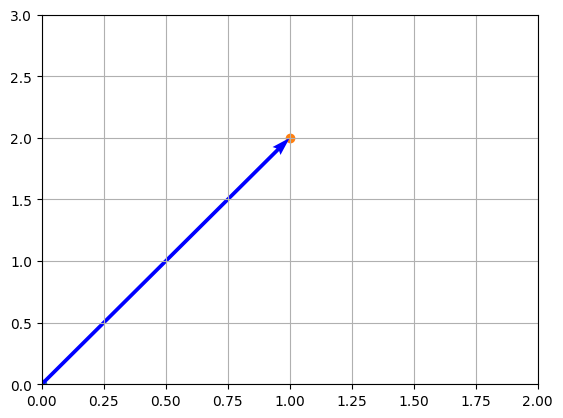

In [ ]:
# Solution Exersice 2.1
x = np.array([1, 2])

A = np.array([[1, 2],
              [3, 4],
              [4, 5]])

print(x)
print(x.shape)

res = np.dot(A, x)

print(res)
print(res.shape)

# Solution Exersice 2.2 a
fig = plt.figure()
plt.xlim(0, 2)
plt.ylim(0, 3)
plt.grid()
plt.scatter(0,0)
plt.scatter(1,2)
plt.quiver(0, 0, 1, 2, angles='xy', scale_units='xy',  scale=1, color="blue")

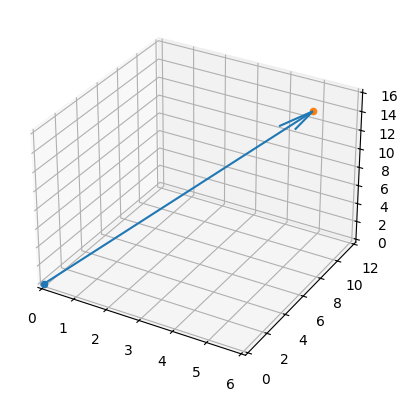

In [ ]:
# Solution Exersice 2.2b
fig = plt.figure()
ax = fig.add_subplot(projection='3d')                  
ax.set_xlim3d(0, 6)
ax.set_ylim3d(0, 12)
ax.set_zlim3d(0, 16)
ax.scatter(0,0,0)
ax.scatter(5,11,14)
ax.quiver(0, 0, 0, 5, 11, 14, arrow_length_ratio=0.1)

# Exercise 3

Transform the image using the following matrix and show the resulting images
hint: borrow the idea from the code for rotation example

\begin{bmatrix}
1 & 3\\
0 & 1
\end{bmatrix}

# Reading images using opencv library

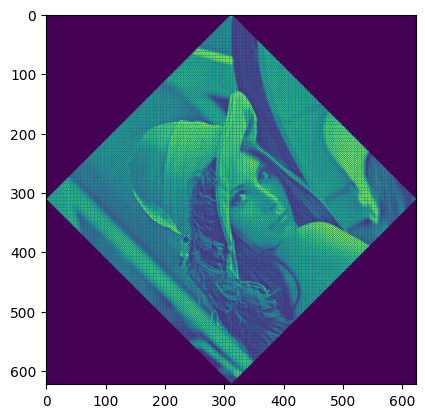

In [ ]:
import cv2

angle = 45      # Ask the user to enter the angle of rotation¨

image = cv2.imread('Images/lena.png', 0)

# Define the most occuring variables
angle=math.radians(angle)                               #converting degrees to radians
cosine=math.cos(angle)
sine=math.sin(angle)
_sine = sine *-1

rotation_matrix = np.array([[cosine, _sine],         
                                [sine, cosine]])

height=image.shape[0]                                   #define the height of the image
width=image.shape[1]                                    #define the width of the image

# Define the height and width of the new image that is to be formed
new_height  = round(abs(image.shape[0]*rotation_matrix[0][0])+abs(image.shape[1]*rotation_matrix[0][1]))+1
new_width  = round(abs(image.shape[1]*rotation_matrix[1][0])+abs(image.shape[0]*rotation_matrix[1][1]))+1

# define another image variable of dimensions of new_height and new _column filled with zeros
output=np.zeros((new_height,new_width))

# Find the centre of the image about which we have to rotate the image
original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image

# Find the centre of the new image that will be obtained
new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image

for i in range(height):
    for j in range(width):
        #co-ordinates of pixel with respect to the centre of original image
        y=image.shape[0]-1-i-original_centre_height                   
        x=image.shape[1]-1-j-original_centre_width                      

        #co-ordinate of pixel with respect to the rotated image
        new_y=round(x*rotation_matrix[0][1]+y*rotation_matrix[0][0])
        new_x=round(x*rotation_matrix[0][0]+y*rotation_matrix[1][0])

        '''since image will be rotated the centre will change too, 
           so to adust to that we will need to change new_x and new_y with respect to the new centre'''
        new_y=new_centre_height-new_y
        new_x=new_centre_width-new_x

        # adding if check to prevent any errors in the processing
        if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
            output[new_y,new_x]=image[i][j]                          #writing the pixels to the new destination in the output image

plt.imshow(output)

# Solution exersice 3:

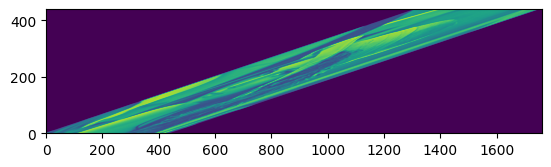

In [ ]:
def image_transform(image, transformation_matrix):  #This function works for non-rotational matricies as argument. 
    image = image.T

    height=image.shape[0]                                  
    width=image.shape[1]                                   

    new_height  = round(abs(image.shape[0]*transformation_matrix[0][0])+abs(image.shape[1]*transformation_matrix[0][1]))+1
    new_width  = round(abs(image.shape[1]*transformation_matrix[1][0])+abs(image.shape[0]*transformation_matrix[1][1]))+1

    output=np.zeros((new_height,new_width))

    for i in range(height):
        for j in range(width):
            y=image.shape[0]-1-i                   
            x=image.shape[1]-1-j                      

            new_y=round(x*transformation_matrix[0][1]+y*transformation_matrix[0][0])
            new_x=round(x*transformation_matrix[0][0]+y*transformation_matrix[1][0])

            if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                output[new_y,new_x]=image[i][j]                          

    plt.imshow(output.T, origin='lower')
    return output

img = cv2.imread('Images/lena.png', 0)
mat = np.array([[1, 3],
                [0, 1]])

test = image_transform(img, mat)

# Exercise 4

- Find a transformation matrix that mirror the image across x axis and apply it on Lenna image
- Find a transformation matrix that mirror the image across y axis and apply it on Lenna image

In [ ]:
def image_rotate(image, rotation_matrix):   #This function works for rotational matricies as argument. 
    height=image.shape[0]
    width=image.shape[1]

    new_height = round(abs(image.shape[0]*rotation_matrix[0][0])+abs(image.shape[1]*rotation_matrix[0][1]))+1
    new_width = round(abs(image.shape[1]*rotation_matrix[1][0])+abs(image.shape[0]*rotation_matrix[1][1]))+1

    output=np.zeros((new_height,new_width))

    original_centre_height = round(((image.shape[0]+1)/2)-1)    
    original_centre_width = round(((image.shape[1]+1)/2)-1)    

    new_centre_height= round(((new_height+1)/2)-1)       
    new_centre_width= round(((new_width+1)/2)-1)          

    for i in range(height):
        for j in range(width):

            y=image.shape[0]-1-i-original_centre_height                   
            x=image.shape[1]-1-j-original_centre_width                      

            new_y=round(x*rotation_matrix[0][1]+y*rotation_matrix[0][0])
            new_x=round(x*rotation_matrix[0][0]+y*rotation_matrix[1][0])

            new_y=new_centre_height-new_y
            new_x=new_centre_width-new_x

            if 0 <= new_x < new_width and 0 <= new_y < new_height and new_x>=0 and new_y>=0:
                output[new_y,new_x]=image[i][j]                       

    plt.imshow(output)
    return output

# Solution exersice 4:

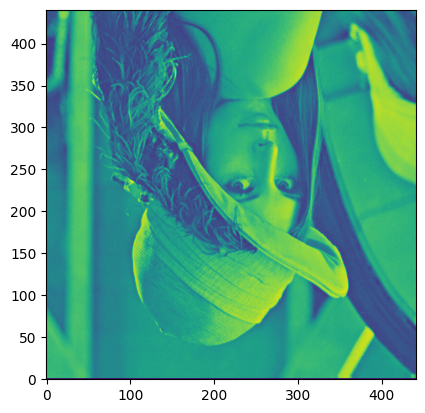

In [ ]:
#Solution exersice 4.1:
mirror_x_matrix = np.array([[1, 0],
                             [0, -1]])

x = image_rotate(img, mirror_x_matrix)
plt.imshow(x, origin='lower')

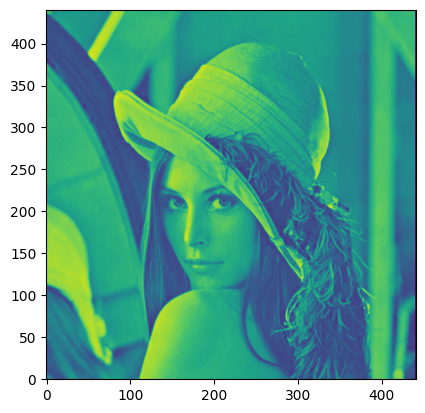

In [ ]:
#Solution exersice 4.2:
mirror_y_matrix = np.array([[-1, 0],
                             [0, 1]])

y = image_rotate(img, mirror_y_matrix)
plt.imshow(y, origin='lower')

# Exercise 5

- Use the inverse of matrix to find the solutions to the following system of linear equations


$ x_1 - 2x_3 = 4 \\ -3x_1 + x_2 +4x_3 =1 \\ 2x_1 -3x_2 +4x_3 =5 $

- Find the inverse matrix of the following system of linear equations, and then calculate $A A^{-1}$. If the resulting matrix is not identity matrix, reason about why this happened.

$ x_1 + 2x_3 = 5 \\ -3x_1 - x_2 +6x_3 =2 \\ -2x_1 - x_2 +8x_3 =7 $

# Inverse of a matrix

In [ ]:
A = np.array([[1,3],[0,1]])
np.linalg.inv(A)

array([[ 1., -3.],
       [ 0.,  1.]])

# Solution exersice 5: 

In [ ]:
#Solution Exersice 5:
print("--- TASK 5.1 ---\n")
A = np.array([
    [1, 0, -2],
    [-3, 1, 4],
    [2, -3, 4]
])

B = np.array([4, 1, 5])
A_inverse = np.linalg.inv(A)
solution = np.dot(A_inverse, B)
print(f"Solution for Matrix AB is: {solution}\n")

print("--- TASK 5.2 ---\n")
A1 = np.array([
    [1, 0, 2],
    [-3, -1, 6],
    [-2, -1, 8]])

B1 = np.array([5,2,7])

A1_inverse = np.linalg.inv(A1)
print(A1_inverse)
print(np.dot(A1, A1_inverse))
print(np.linalg.det(A1),"\n")

# the determinant of the matrix A1 is very close to 0, meaning that the matrix is in fact invertible.
# But due to limited precision when working with large numbers of decimals,
# when computing A1 * A1_inverse, the output matrix is not exactly
# the identity matrix due to numerical approximations. In a more precise computation,
# the output would approach the identity matrix [[1, 0, 0], [0, 1, 0], [0, 0, 1]].

--- TASK 5.1 ---

Solution for Matrix AB is: [40. 49. 18.]

--- TASK 5.2 ---

[[-2.25179981e+15 -2.25179981e+15  2.25179981e+15]
 [ 1.35107989e+16  1.35107989e+16 -1.35107989e+16]
 [ 1.12589991e+15  1.12589991e+15 -1.12589991e+15]]
[[ 0.75  0.    0.5 ]
 [ 0.    0.5  -0.5 ]
 [ 0.    1.    0.  ]]
8.881784197001244e-16 



# Exercise 6

Given the following vectors and a matrix constructed with these two vectors as its columns

v = [1,0]
w = [0,1]

- Rotate the vectors by 30 degrees and calculate the determinant of the resulting matrix
- Scale the the vectors by an arbitrary scaler and calulate the determinant of the resulting matrix
- Reflet the vectors across y axis and calculate the determinant of the reflection matrix


In [ ]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        if (isinstance(alpha, list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha_i)


# Determinants


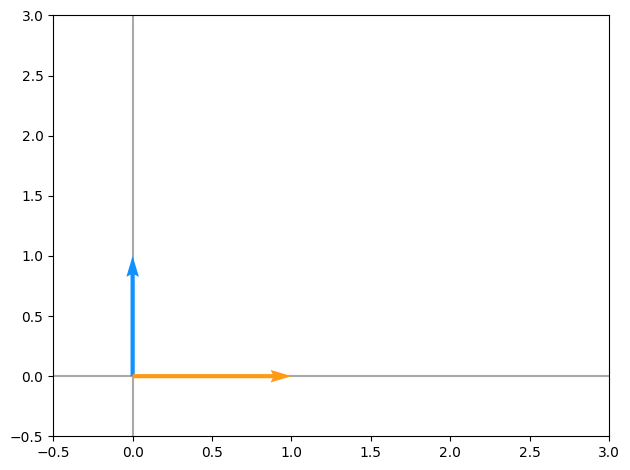

In [ ]:
orange = '#FF9A13'
blue = '#1190FF'
    
i = [0, 1]
j = [1, 0]

plotVectors([i, j], [[blue], [orange]])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.tight_layout()
plt.show()


In [ ]:
A = np.array([j, i])
np.linalg.det(A)

1.0

In [ ]:
A = np.array([[2,0],[0,3]])
np.linalg.det(A)

6.0

# Solution exersice 6:

In [ ]:
# Solution exersice 6:
print("--- TASK 6.1 ---\n")
# Given vectors
v = np.array([1, 0])
w = np.array([0, 1])


def rotation_matrix(vector_1, vector_2, degrees_of_rotation):

    radians_rotations = np.radians(degrees_of_rotation)
    rotation_matrix = np.array([[np.round(np.cos(radians_rotations), 5), np.round(-np.sin(radians_rotations), 5)],
                            [np.round(np.sin(radians_rotations), 5), np.round(np.cos(radians_rotations), 5)]])

    rotated_v = np.dot(rotation_matrix, vector_1)
    rotated_w = np.dot(rotation_matrix, vector_2)
    rotated_vectors_as_matrix = np.column_stack((rotated_v, rotated_w))
    return rotated_vectors_as_matrix

rotated_matrix = rotation_matrix(v, w, 30)

print("Rotated Matrix:", rotated_matrix)
print("Determinant of Rotated Matrix:", np.linalg.det(rotated_matrix),"\n")


print("--- TASK 6.2 ---\n")
scaled_v = v * 2
scaled_w = w * 2
scaled_matrix = np.column_stack((scaled_v, scaled_w))
determinant_scaled_matrix = np.linalg.det(scaled_matrix)
print("Determinant of the scaled vector matrix is: ", determinant_scaled_matrix, "\n")


print("--- TASK 6.3 ---\n")
#Y-axis reflection matrix
R_yaxis = np.array([
    [-1, 0],
    [0, 1]])

# Reflect the vectors
v_reflected = np.dot(R_yaxis, v)
w_reflected = np.dot(R_yaxis, w)


reflected_matrix = np.column_stack((v_reflected,w_reflected))
det_original = np.linalg.det(np.column_stack((v, w)))
det_reflected = np.linalg.det(reflected_matrix)

print("Determinant of Original Matrix:", det_original)
print("Determinant of Reflected Matrix:", det_reflected)
print(reflected_matrix)

--- TASK 6.1 ---

Rotated Matrix: [[ 0.86603 -0.5    ]
 [ 0.5      0.86603]]
Determinant of Rotated Matrix: 1.0000079608999999 

--- TASK 6.2 ---

Determinant of the scaled vector matrix is:  4.0 

--- TASK 6.3 ---

Determinant of Original Matrix: 1.0
Determinant of Reflected Matrix: -1.0
[[-1  0]
 [ 0  1]]


# Exercise 7

Select 5 different combinations of two features. Repeat the following procedure for each combination:

1- Create a dataset of two columns in which each of the two features are a column in the dataset.

2- Scatter plot them

3- Calculate the correlation matrix

4- Calculate the determinant


Try to choose combinations of features that some of which has high correlation and some of which has low correlations. 

Reason about the relationship between the determinant and shape of the scatter plot.

In [ ]:
from sklearn import datasets
data = datasets.fetch_california_housing()

X = np.array(data.data)
y = np.array(data.target)
feat_names = data.feature_names
X_transposed = X.T
corr = np.corrcoef(X_transposed)
determinant = np.linalg.det(corr)


# Data visualizationa and prep
#print(f"Shape of X is {X.shape}\n")
#print(f"Shape of y is {y.shape}\n")
#print(f"The shape of X transposed is {X_transposed.shape}\n")
#print(f"The correlation matrix of X is: \n {corr} \n")
#print(f"Determinant of correlation matrix is: {determinant} \n")
#print(f"Frist 5 rows of X: \n {X[:5, :]}\n")
#print(f"First 5 y: \n {y[:5]}\n")
#print(f"The respective feature names are: {feat_names}\n")

# Solution exersice 7:

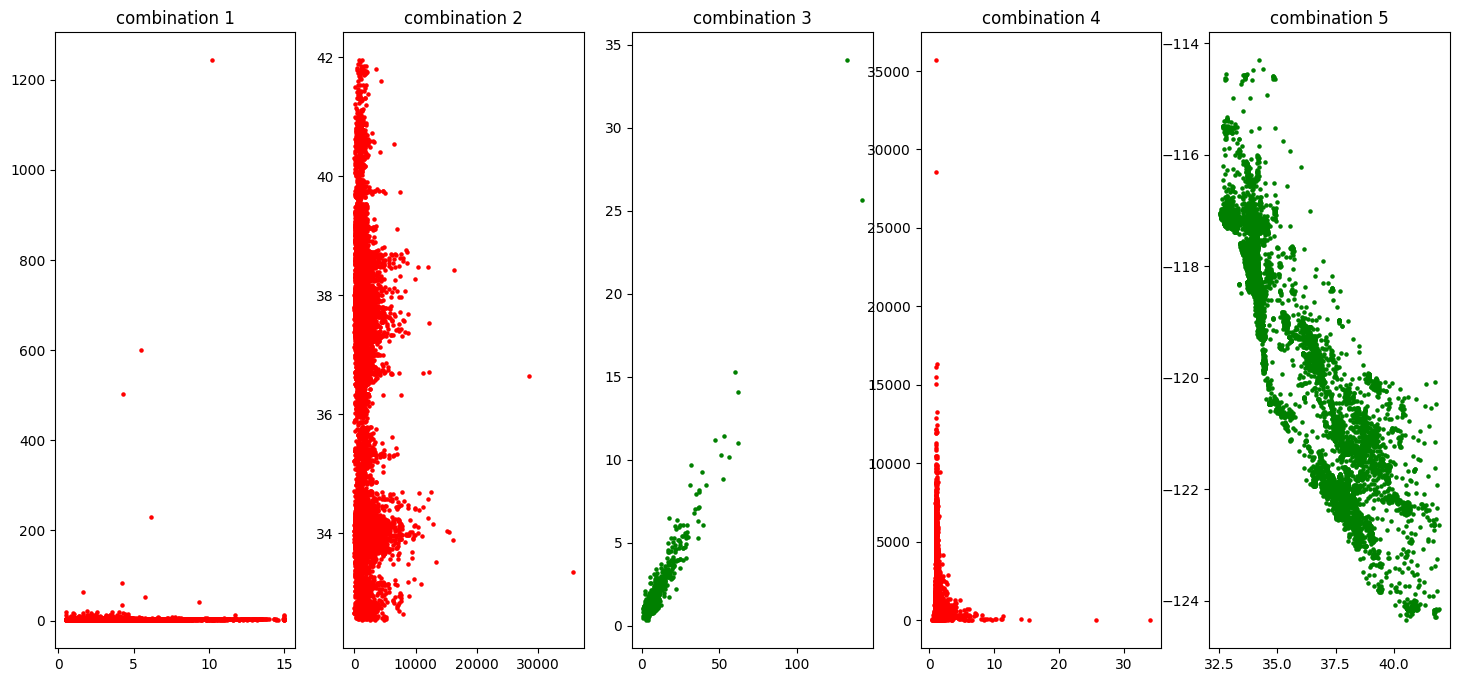

Correlation matrix for combination 1:
 [[1.         0.01876625]
 [0.01876625 1.        ]]

Correlation matrix for combination 2:
 [[ 1.         -0.10878475]
 [-0.10878475  1.        ]]

Correlation matrix for combination 3:
 [[1.         0.84762133]
 [0.84762133 1.        ]]

Correlation matrix for combination 4:
 [[ 1.        -0.0661974]
 [-0.0661974  1.       ]]

Correlation matrix for combination 5:
 [[ 1.         -0.92466443]
 [-0.92466443  1.        ]]

The Determinant for the correlation matrix for combination 1 is: 0.9996478279372422
The Determinant for the correlation matrix for combination 2 is: 0.988165878737977
The Determinant for the correlation matrix for combination 3 is: 0.28153808819646026
The Determinant for the correlation matrix for combination 4 is: 0.995617903925189
The Determinant for the correlation matrix for combination 5 is: 0.14499568465257795


In [ ]:
# Solution exersice 7:

# 7.1 combinations of columns creating 5 different datasets:

comb1_transposed = np.zeros((2, len(y)))
comb1_transposed[0], comb1_transposed[1] = X_transposed[0], X_transposed[5]
comb1 = comb1_transposed.T

comb2_transposed = np.zeros((2, len(y)))
comb2_transposed[0], comb2_transposed[1] = X_transposed[4], X_transposed[6]
comb2 = comb2_transposed.T

comb3_transposed = np.zeros((2, len(y)))
comb3_transposed[0], comb3_transposed[1] = X_transposed[2], X_transposed[3]
comb3 = comb3_transposed.T

comb4_transposed = np.zeros((2, len(y)))
comb4_transposed[0], comb4_transposed[1] = X_transposed[3], X_transposed[4]
comb4 = comb4_transposed.T

comb5_transposed = np.zeros((2, len(y)))
comb5_transposed[0], comb5_transposed[1] = X_transposed[6], X_transposed[7]
comb5 = comb5_transposed.T

# 7.2 plotting:
plt.figure(figsize=(18,8))

plt.subplot(1, 5, 1) 
plt.scatter(comb1[:, 0], comb1[:, 1], color="red", s=5)
plt.title("combination 1")

plt.subplot(1, 5, 2)
plt.scatter(comb2[:, 0], comb2[:, 1], color="red", s=5)
plt.title("combination 2")

plt.subplot(1, 5, 3)
plt.scatter(comb3[:, 0], comb3[:, 1], color="green", s=5)
plt.title("combination 3")

plt.subplot(1, 5, 4)
plt.scatter(comb4[:, 0], comb4[:, 1], color="red", s=5)
plt.title("combination 4")

plt.subplot(1, 5, 5)
plt.scatter(comb5[:, 0], comb5[:, 1], color="green", s=5)
plt.title("combination 5")

plt.show()

# 7.3 calculate the correlation matrix:
corr_comb1 = np.corrcoef(comb1_transposed)
print(f"Correlation matrix for combination 1:\n {corr_comb1}\n")

corr_comb2 = np.corrcoef(comb2_transposed)
print(f"Correlation matrix for combination 2:\n {corr_comb2}\n")

corr_comb3 = np.corrcoef(comb3_transposed)
print(f"Correlation matrix for combination 3:\n {corr_comb3}\n")

corr_comb4 = np.corrcoef(comb4_transposed)
print(f"Correlation matrix for combination 4:\n {corr_comb4}\n")

corr_comb5 = np.corrcoef(comb5_transposed)
print(f"Correlation matrix for combination 5:\n {corr_comb5}\n")


# 7.4 calculate the determinant for the correlation matrices:
det_corr_comb1 = np.linalg.det(corr_comb1)
print(f"The Determinant for the correlation matrix for combination 1 is: {det_corr_comb1}")

det_corr_comb2 = np.linalg.det(corr_comb2)
print(f"The Determinant for the correlation matrix for combination 2 is: {det_corr_comb2}")

det_corr_comb3 = np.linalg.det(corr_comb3)
print(f"The Determinant for the correlation matrix for combination 3 is: {det_corr_comb3}")

det_corr_comb4 = np.linalg.det(corr_comb4)
print(f"The Determinant for the correlation matrix for combination 4 is: {det_corr_comb4}")

det_corr_comb5 = np.linalg.det(corr_comb5)
print(f"The Determinant for the correlation matrix for combination 5 is: {det_corr_comb5}")

7.5 Reason about the correlation between the determinant and the shape of the scatter plot:

As we know, when the determinant of the correlation matrix is 0, we have perfect correlation between the variables. 
For the determinant to be 0 in a correlation matrix, the product of the elements in counterdiagonal in the 2x2 correlation matrix needs to close to 1.

The scatter plots of the combinations that have low determinants as compared to the other combinations (combination 3 and 5) seems to follow a diagonal line. 
The difference in which way the diagnal line is leaning can be observed in the respective correlation matricies since the elements in the conuterdiagonals are positive and negative respectively. 

If the datapoints fall on a perfect diagonal line in the scatter plot, it means that the datapoints in the two different columns in the dataset are the same, which in turn means that they are perfectly correlated and have a determinant of 0. This would explain why the datasets with low determinants in the correlation dataset seem to follow a diagonal, whereas the datasets withd the high deteminants do not. 


# Exercise 8 

- Create 2d dataset in with the determinant of the correlation matrix is very close to zero
- Create 2d dataset in with the determinant of the correlation matrix is very close to one

#  Solution exersice 8:

In [ ]:
# Solution exersice 8.2:
mean = [0, 0]                      # Mean of the n-dimensonal (in this case 2-dimensional) distribution
cov = [[1, 0.9999],               # Covariance matrix
       [0.9999, 1]]
data = np.random.multivariate_normal(mean, cov, 10000)         # function that creates the random dataset with 10000 datapoints with the given mean and covariance

corr_matrix = np.corrcoef(data, rowvar=False)           # function that returns a matrix of the pearson-product correlation coeficients from the dataset

determinant = np.linalg.det(corr_matrix)         #calculating the determinant of the correlation matrix to see its value

# Presenting the result
print("Correlation Matrix:")
print(corr_matrix)
print("\nDeterminant of Correlation Matrix:", determinant)

Correlation Matrix:
[[1.         0.99990403]
 [0.99990403 1.        ]]

Determinant of Correlation Matrix: 0.00019192825102110062


In [ ]:
# Solution exersice 8.2:
mean = [0, 0]                      # Mean of the n-dimensonal (in this case 2-dimensional) distribution
cov = [[1, 0.00001],               # Covariance matrix  
       [0.00001, 1]]
data = np.random.multivariate_normal(mean, cov, 10000)         # function that creates the random dataset with 10000 datapoints with the given mean and covariance

corr_matrix = np.corrcoef(data, rowvar=False)           # function that returns a matrix of the pearson-product correlation coeficients from the dataset

determinant = np.linalg.det(corr_matrix)         #calculating the determinant of the correlation matrix to see its value

# Presenting the result
print("Correlation Matrix:")
print(corr_matrix)
print("\nDeterminant of Correlation Matrix:", determinant)

Correlation Matrix:
[[1.00000000e+00 9.29986006e-04]
 [9.29986006e-04 1.00000000e+00]]

Determinant of Correlation Matrix: 0.9999991351260293
